<a href="https://colab.research.google.com/github/ChidiebereEke2205/dissertation/blob/main/Imbalance_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
churn = pd.read_csv('/content/Customer-Churn-Records.csv')
churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [ ]:
churn.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
9995         96270.64       0         0                   1   DIAMOND   
9996        101699.77       0         0                   5  PLATINUM   
9997         42085.58       1         1                   3    SILVER   
9998         92888.52       1         1                   2      GOLD   
9999         38190.78       0         0                   3   DIAMOND   

      Point Earned  
9995           300  
9996           771  
9997           564  
9998           339  
9999           911

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
churn.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

In [ ]:
# checking for number of null value
churn.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [ ]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=e7a6b82a5eb3e376134d74bfface4d06790287d2cb4730f4d3b0c9328fd552da
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [ ]:
import pandas_profiling

<ipython-input-9-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
pandas_profiling.ProfileReport(pd.read_csv('/content/Customer-Churn-Records.csv'))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
churn = churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [ ]:
churn.head(6)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   
5          645     Spain    Male   44       8  113755.78              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0          1               1        101348.88       1         1   
1          0               1        112542.58       0         1   
2          1               0        113931.57       1         1   
3          0               0         93826.63       0         0   
4          1               1         79084.10       0         0   
5          1               0        149756.71       1         1   

   Satisfaction Score Card Type  Point Earned  
0                   2   DIAMOND           464  
1                   3   DIAMOND           456  
2                   3   DIAMOND           377  
3                   5      GOLD           350  
4                   5      GOLD           425  
5                   5   DIAMOND           484

In [ ]:
# Find the correlation between our independent variables
corr_matrix = churn.corr()
corr_matrix

<ipython-input-13-694a61390bc4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = churn.corr()


CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore            1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                   -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure                 0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance                0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts          0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard             -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember         0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary       -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited                -0.026771  0.285296 -0.013656  0.118577      -0.047611   
Complain              -0.027048  0.283530 -0.013047  0.119124      -0.046357   
Satisfaction Score    -0.012599 -0.000876  0.008663 -0.002588      -0.011394   
Point Earned           0.000077  0.002222 -0.010196  0.014608      -0.015330   

                    HasCrCard  IsActiveMember  EstimatedSalary    Exited  \
CreditScore         -0.005458        0.025651        -0.001384 -0.026771   
Age                 -0.011721        0.085472        -0.007201  0.285296   
Tenure               0.022583       -0.028362         0.007784 -0.013656   
Balance             -0.014858       -0.010084         0.012797  0.118577   
NumOfProducts        0.003183        0.009612         0.014204 -0.047611   
HasCrCard            1.000000       -0.011866        -0.009933 -0.006976   
IsActiveMember      -0.011866        1.000000        -0.011421 -0.156356   
EstimatedSalary     -0.009933       -0.011421         1.000000  0.012490   
Exited              -0.006976       -0.156356         0.012490  1.000000   
Complain            -0.007095       -0.154741         0.012494  0.995693   
Satisfaction Score  -0.000212        0.010236        -0.013747 -0.005849   
Point Earned        -0.011041       -0.004983        -0.001515 -0.004628   

                    Complain  Satisfaction Score  Point Earned  
CreditScore        -0.027048           -0.012599      0.000077  
Age                 0.283530           -0.000876      0.002222  
Tenure             -0.013047            0.008663     -0.010196  
Balance             0.119124           -0.002588      0.014608  
NumOfProducts      -0.046357           -0.011394     -0.015330  
HasCrCard          -0.007095           -0.000212     -0.011041  
IsActiveMember     -0.154741            0.010236     -0.004983  
EstimatedSalary     0.012494           -0.013747     -0.001515  
Exited              0.995693           -0.005849     -0.004628  
Complain            1.000000           -0.004799     -0.002893  
Satisfaction Score -0.004799            1.000000     -0.014400  
Point Earned       -0.002893           -0.014400      1.000000

<ipython-input-14-7aae31b579a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = churn.corr()


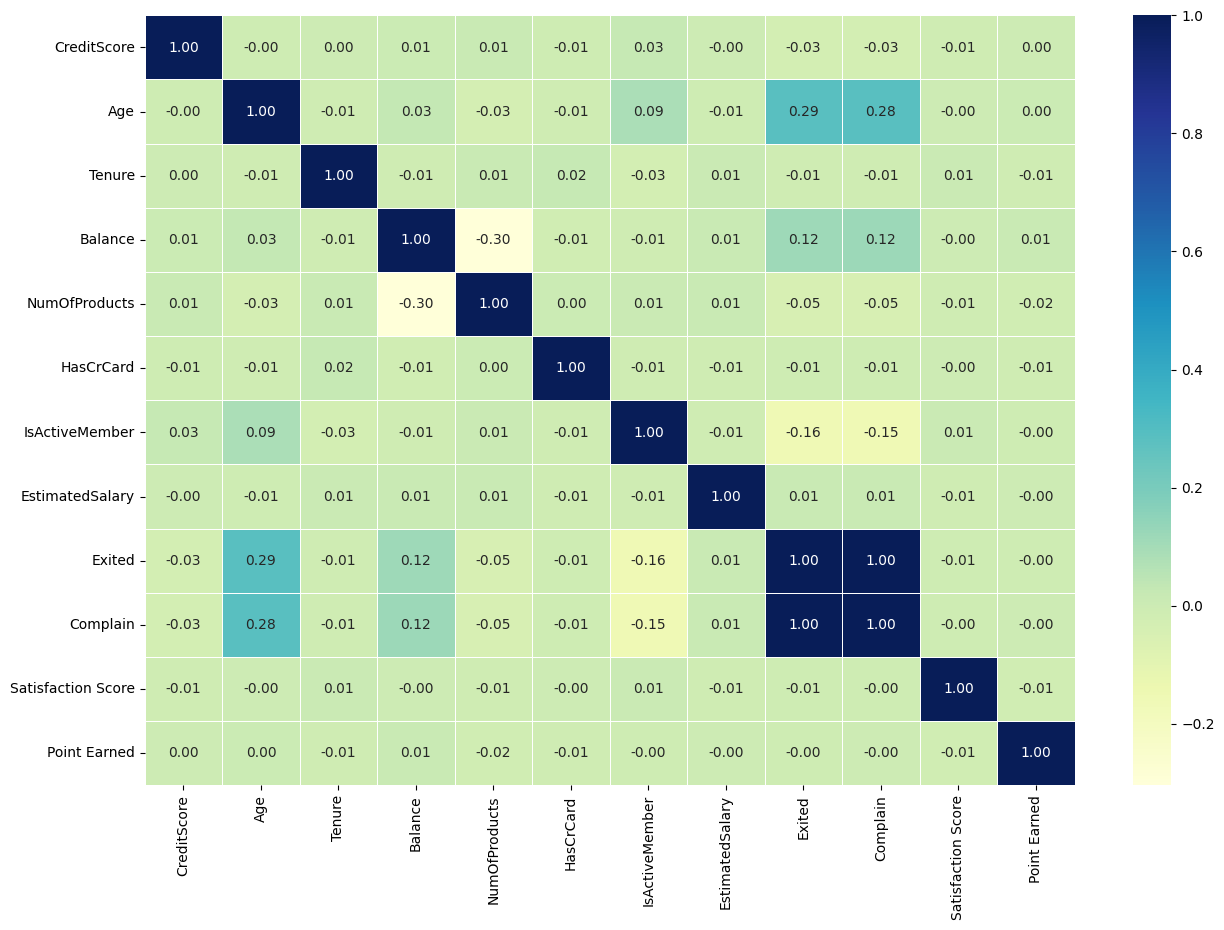

In [ ]:

corr_matrix = churn.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

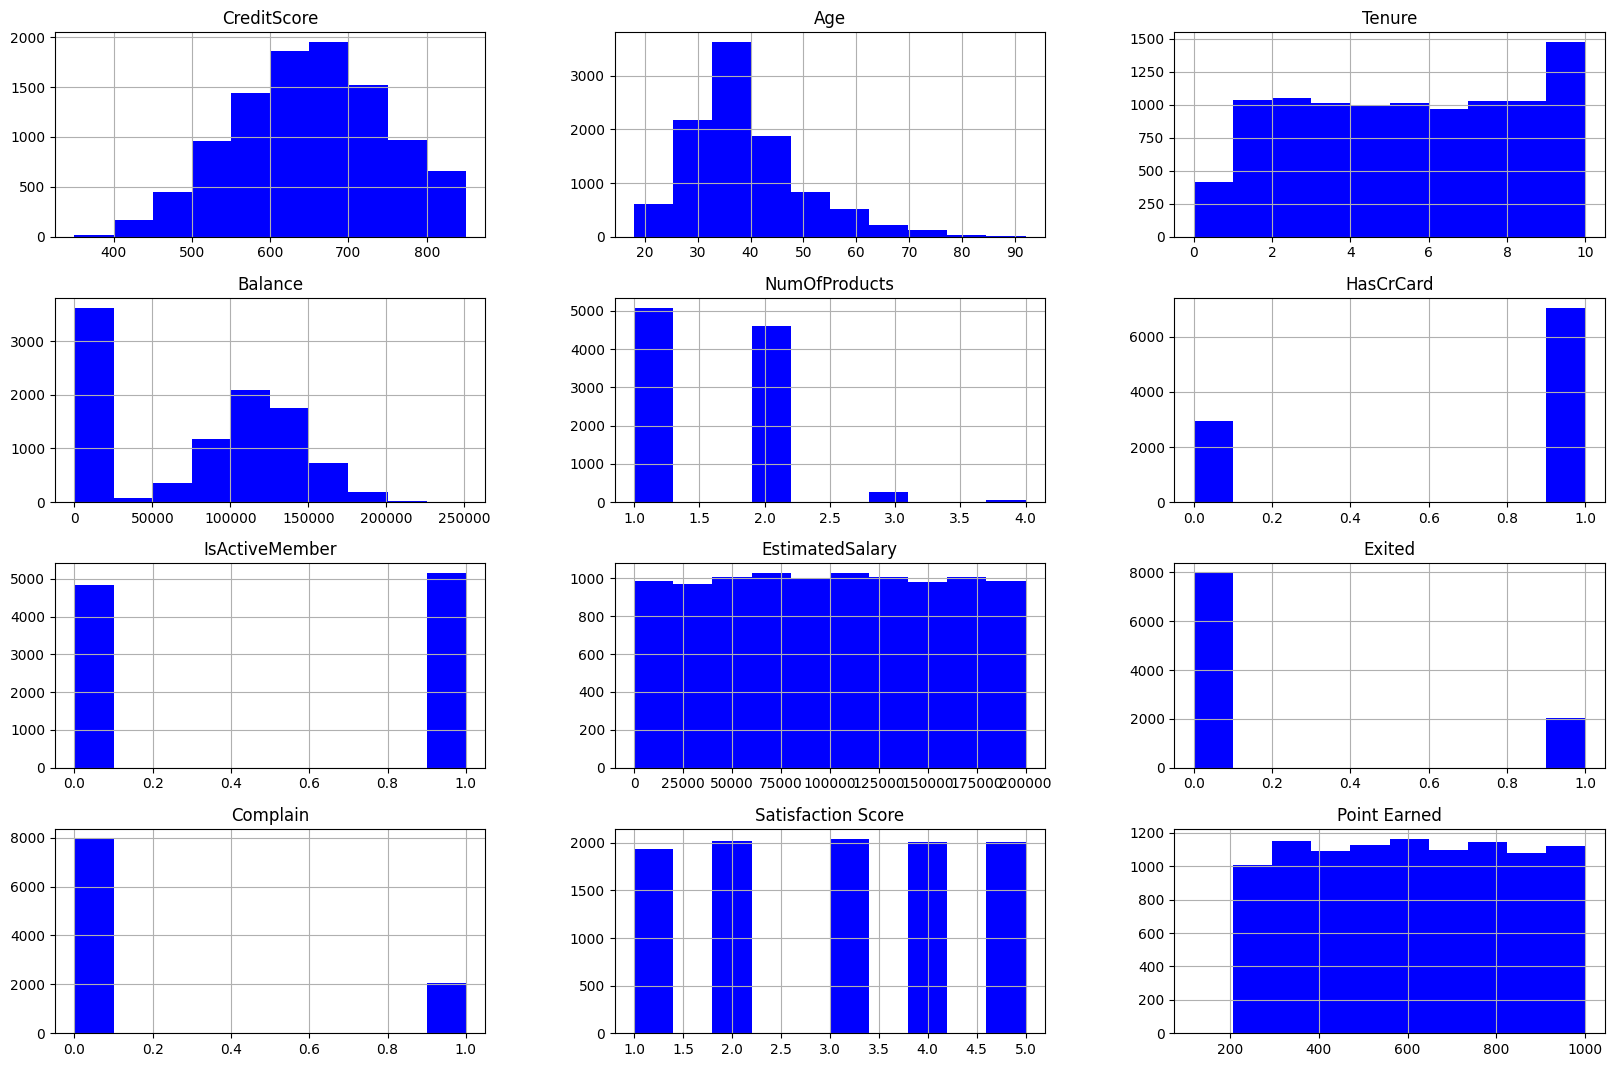

In [ ]:
churn.hist(bins=10, figsize=(20,13), color='Blue')
plt.show()

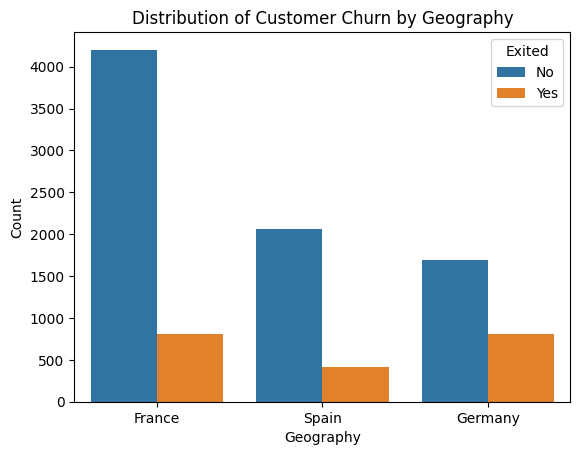

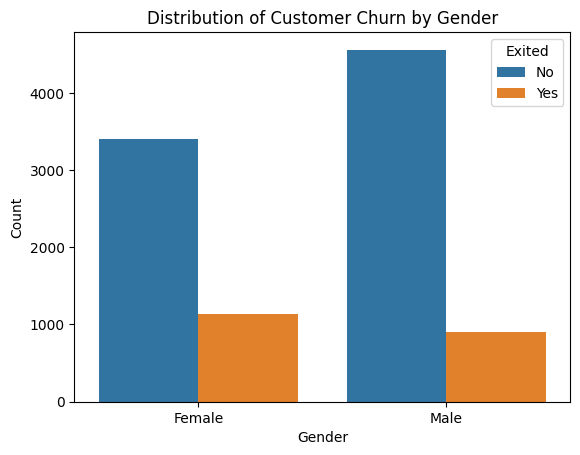

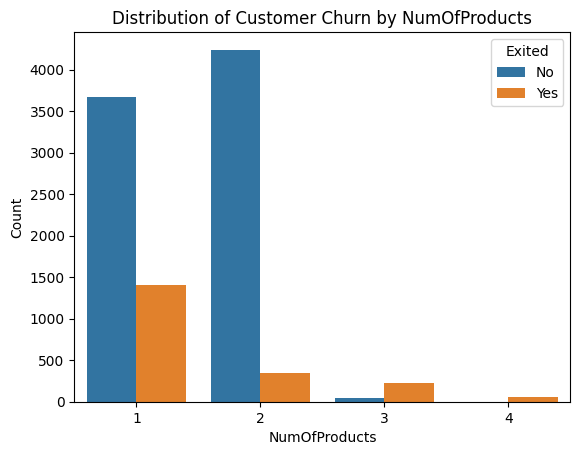

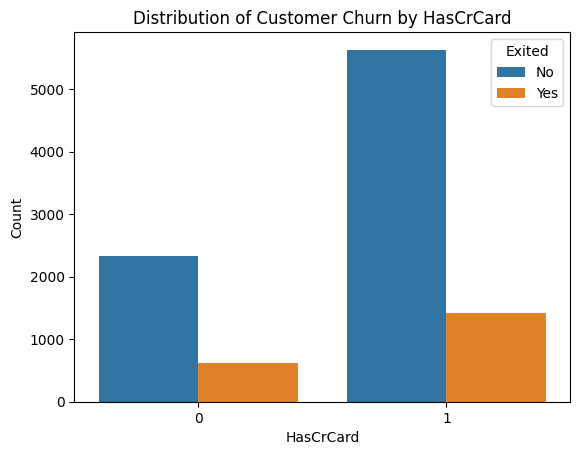

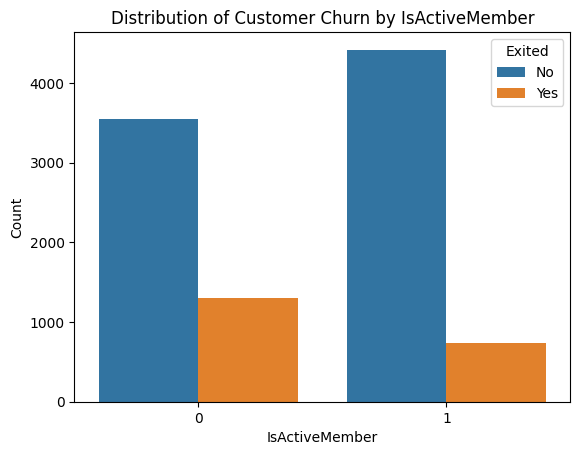

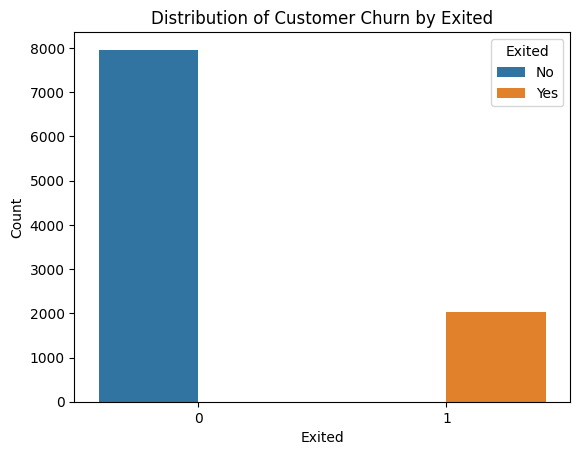

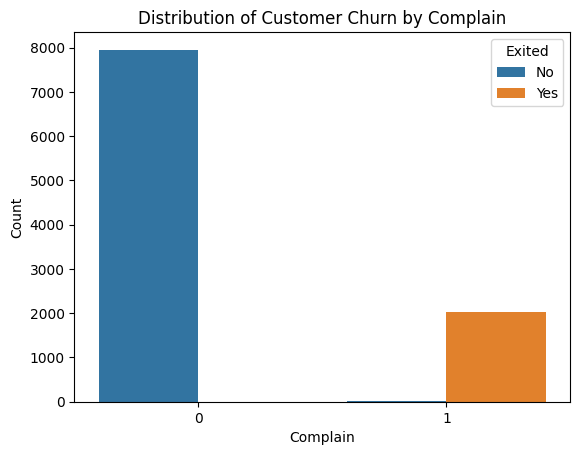

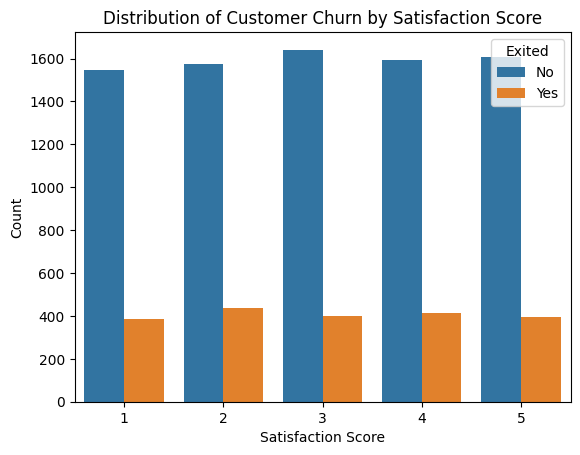

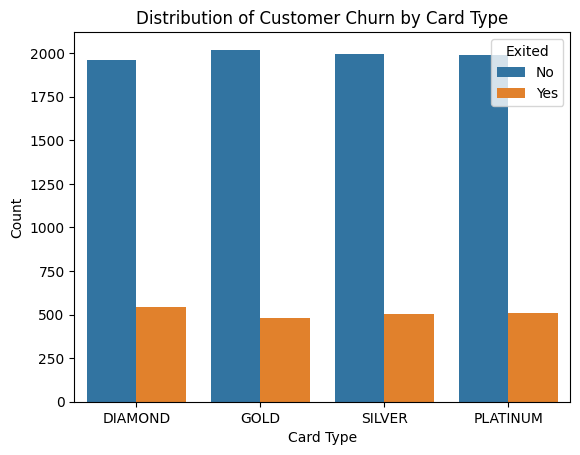

In [ ]:
for i, predictor in enumerate(churn.drop(columns=['Tenure', 'EstimatedSalary','Balance','Age', 'CreditScore', 'Point Earned'])):
    plt.figure(i)
    sns.countplot(data=churn, x=predictor, hue='Exited')
    plt.xlabel(predictor)
    plt.ylabel('Count')
    plt.legend(title='Exited', labels=['No', 'Yes'])
    plt.title(f'Distribution of Customer Churn by {predictor}')
    plt.show()

In [ ]:
churn['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
churn['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [ ]:
churn['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# machine learning only accept numnbers, or int or floats. it doesnt accept string or alphabet. so now we will have to encoding to change the strings to int. we will perform level encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
churn['Geography']= le.fit_transform(churn['Geography'])
churn['Card Type']= le.fit_transform(churn['Card Type'])
churn['Gender']= le.fit_transform(churn['Gender'])

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  int64  
 2   Gender              10000 non-null  int64  
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  int64  
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 1.1 MB


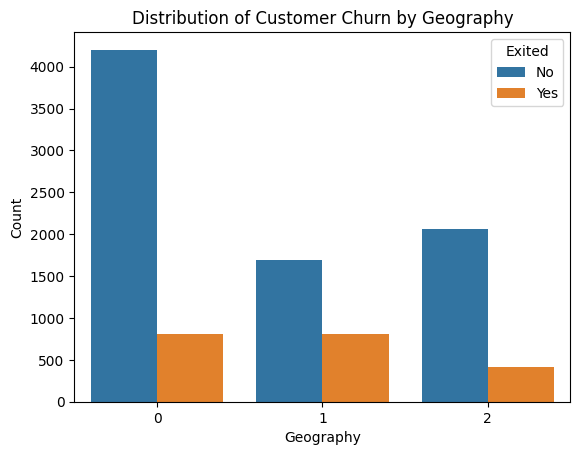

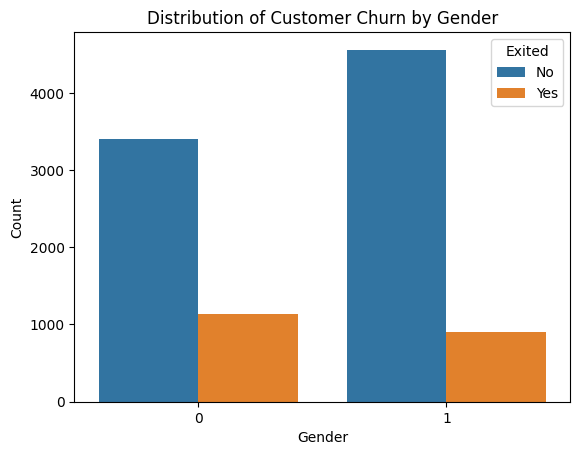

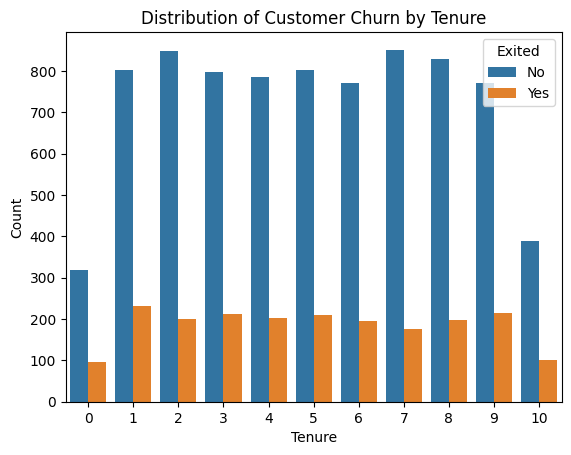

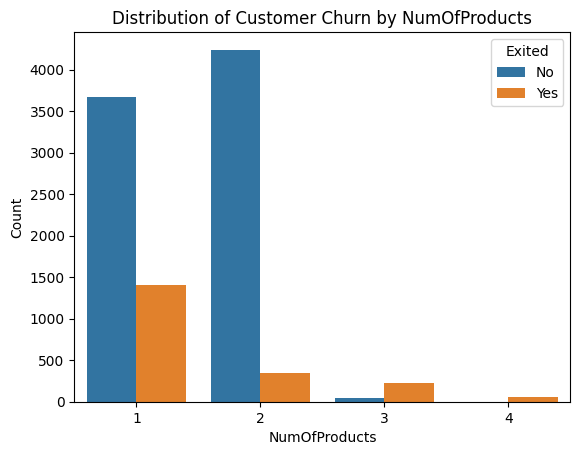

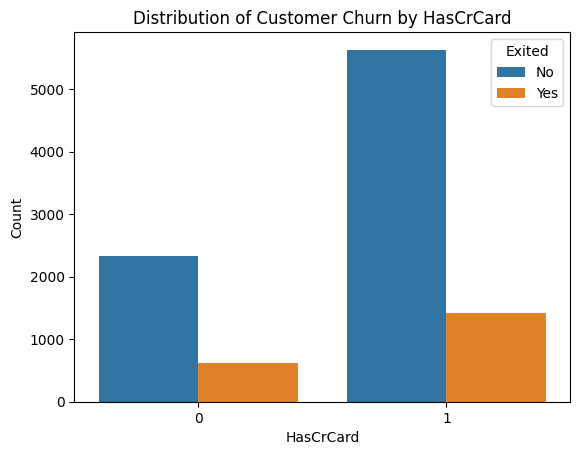

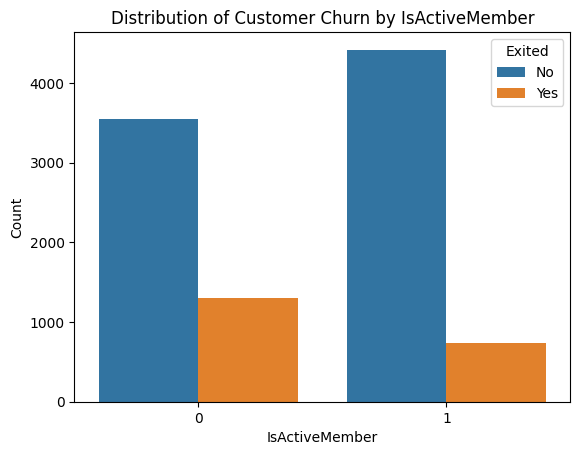

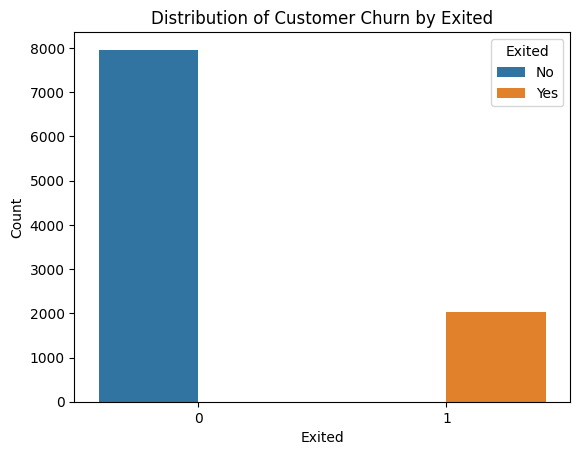

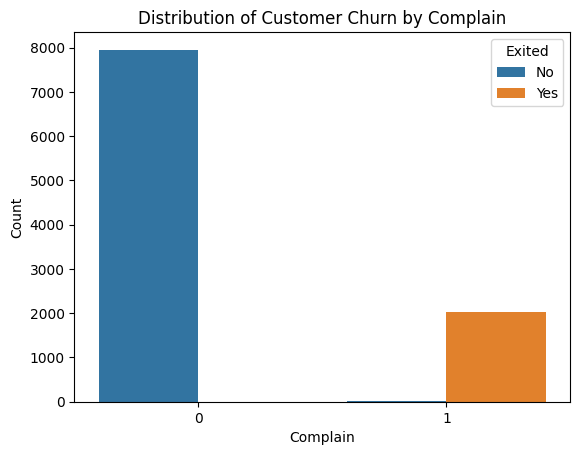

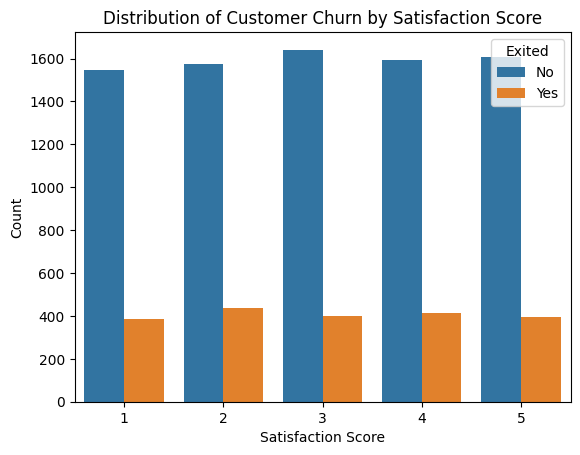

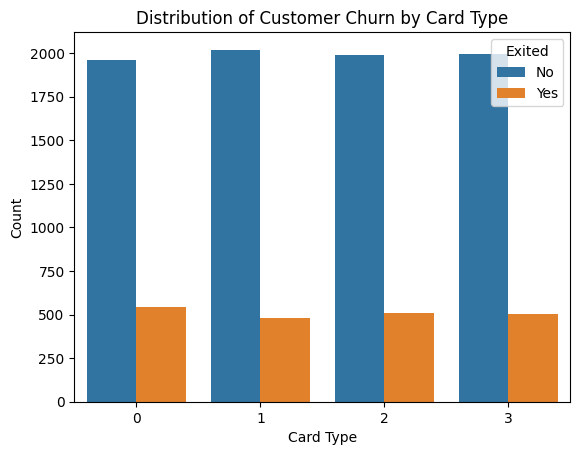

In [ ]:
for i, predictor in enumerate(churn.drop(columns=['EstimatedSalary','Balance','Age', 'CreditScore', 'Point Earned'])):
    plt.figure(i)
    sns.countplot(data=churn, x=predictor, hue='Exited')
    plt.xlabel(predictor)
    plt.ylabel('Count')
    plt.legend(title='Exited', labels=['No', 'Yes'])
    plt.title(f'Distribution of Customer Churn by {predictor}')
    plt.show()

In [ ]:
churn.head(5)

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0          1               1        101348.88       1         1   
1          0               1        112542.58       0         1   
2          1               0        113931.57       1         1   
3          0               0         93826.63       0         0   
4          1               1         79084.10       0         0   

   Satisfaction Score  Card Type  Point Earned  
0                   2          0           464  
1                   3          0           456  
2                   3          0           377  
3                   5          1           350  
4                   5          1           425

In [ ]:
x = churn.drop('Exited', axis=1)
y = churn['Exited']

In [ ]:
x.head(5)

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Complain  Satisfaction Score  \
0          1               1        101348.88         1                   2   
1          0               1        112542.58         1                   3   
2          1               0        113931.57         1                   3   
3          0               0         93826.63         0                   5   
4          1               1         79084.10         0                   5   

   Card Type  Point Earned  
0          0           464  
1          0           456  
2          0           377  
3          1           350  
4          1           425

In [ ]:
y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
churn['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Exited')

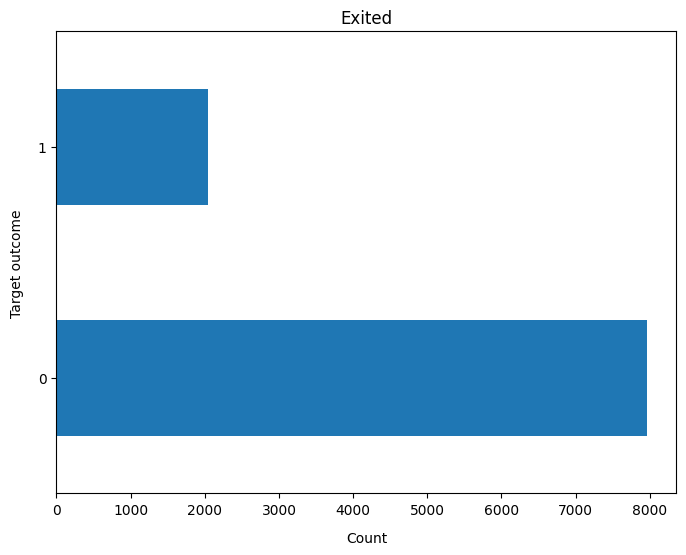

In [ ]:
churn['Exited'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=10)
plt.ylabel("Target outcome", labelpad=10)
plt.title("Exited")

In [ ]:
y.value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [ ]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42) # Split into train_val and test sets

# Print the sizes of the sets
print("Train set size:", x_train.shape[0])
print("Test set size:", x_test.shape[0])


Train set size: 8000
Test set size: 2000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
lr_pred_y = log_reg.predict(x_test)


In [ ]:
print("Accuracy_score =", accuracy_score(y_test, lr_pred_y))
print("precision_score =", precision_score(y_test, lr_pred_y))
print("recall_score =", recall_score(y_test, lr_pred_y))
print("f1_score =", f1_score(y_test,lr_pred_y))

Accuracy_score = 0.999
precision_score = 0.9974554707379135
recall_score = 0.9974554707379135
f1_score = 0.9974554707379135


In [ ]:
#confusion matrix and classification report
lr_cm=confusion_matrix(y_test,lr_pred_y)
print('confusion matrix is',lr_cm)
print('classification report is',classification_report(y_test,lr_pred_y))

confusion matrix is [[1606    1]
 [   1  392]]
classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<Axes: >

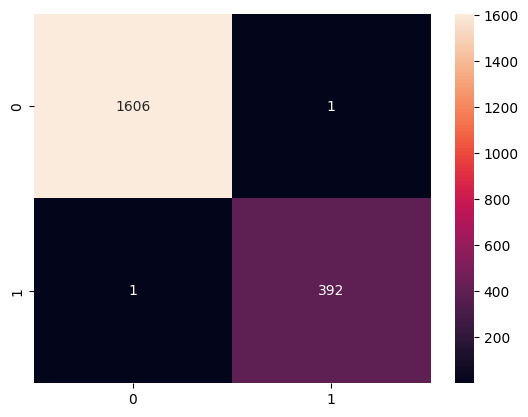

In [ ]:
sns.heatmap(confusion_matrix(y_test,lr_pred_y),annot=True,fmt='d')

Accuracy_score = 0.999
precision_score = 0.9974554707379135
recall_score = 0.9974554707379135
f1_score = 0.9974554707379135


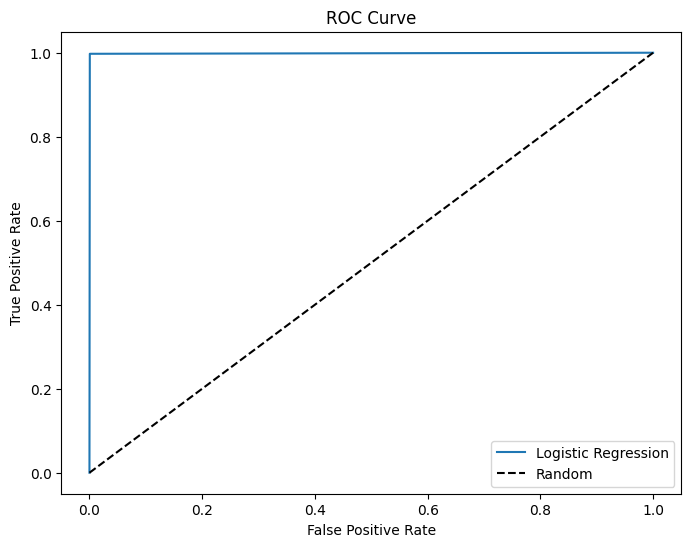

Area Under the Curve (AUC) for Logistic Regression: 0.9984165966010663


In [ ]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
lr_pred_y = log_reg.predict(x_test)

print("Accuracy_score =", accuracy_score(y_test, lr_pred_y))
print("precision_score =", precision_score(y_test,lr_pred_y))
print("recall_score =", recall_score(y_test, lr_pred_y))
print("f1_score =", f1_score(y_test,lr_pred_y))

# Compute ROC curve using predicted labels (y_pred_rf)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_pred_y)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label= 'Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate Area Under the Curve (AUC) for Random Forest
auc_score_lr = roc_auc_score(y_test,lr_pred_y)
print('Area Under the Curve (AUC) for Logistic Regression:', auc_score_lr)


In [ ]:
#Support Vector
svm = svm.SVC()
svm.fit(x_train,y_train)
pred_svm_y = svm.predict(x_test)

In [ ]:
print("Accuracy_score =", accuracy_score(y_test, pred_svm_y))
print("precision_score =", precision_score(y_test, pred_svm_y))
print("recall_score =", recall_score(y_test, pred_svm_y))
print("f1_score =", f1_score(y_test,pred_svm_y))

Accuracy_score = 0.999
precision_score = 0.9974554707379135
recall_score = 0.9974554707379135
f1_score = 0.9974554707379135


In [ ]:
#confusion matrix and classification report
svm_cm=confusion_matrix(y_test,pred_svm_y)
print('confusion matrix is',svm_cm)
print('classification report is',classification_report(y_test,pred_svm_y))

confusion matrix is [[1606    1]
 [   1  392]]
classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<Axes: >

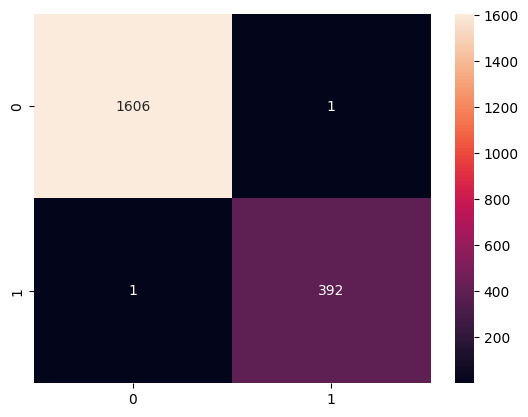

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred_svm_y),annot=True,fmt='d')

Accuracy_score = 0.999
precision_score = 0.9974554707379135
recall_score = 0.9974554707379135
f1_score = 0.9974554707379135


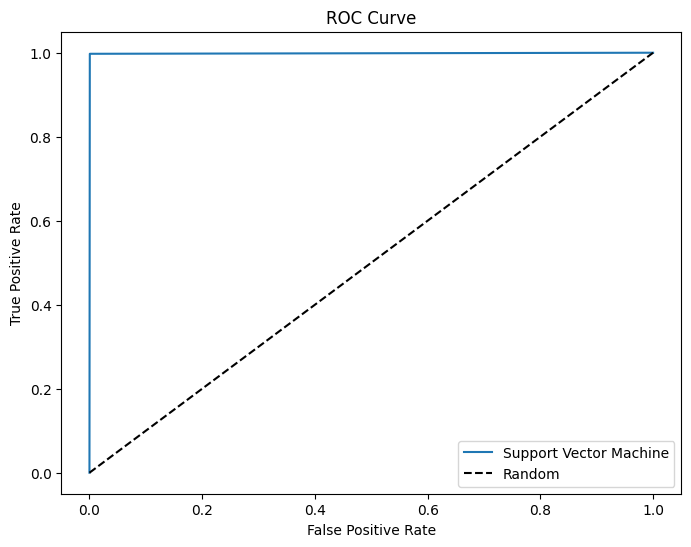

Area Under the Curve (AUC) for Support Vector Machine: 0.9984165966010663


In [ ]:
#Support Vector
svm = SVC()
svm.fit(x_train,y_train)
pred_svm_y = svm.predict(x_test)

print("Accuracy_score =", accuracy_score(y_test, pred_svm_y))
print("precision_score =", precision_score(y_test, pred_svm_y))
print("recall_score =", recall_score(y_test, pred_svm_y))
print("f1_score =", f1_score(y_test,pred_svm_y))
# Compute ROC curve using predicted labels (y_pred_rf)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, pred_svm_y)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label= 'Support Vector Machine')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate Area Under the Curve (AUC) for Random Forest
auc_score_svm = roc_auc_score(y_test,pred_svm_y)
print('Area Under the Curve (AUC) for Support Vector Machine:', auc_score_svm)

In [ ]:
#Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
pred_nb_y = nb.predict(x_test)

In [ ]:
print("Accuracy_score =", accuracy_score(y_test, pred_nb_y ))
print("precision_score =", precision_score(y_test,pred_nb_y ))
print("recall_score =", recall_score(y_test, pred_nb_y ))
print("f1_score =", f1_score(y_test,pred_nb_y ))

Accuracy_score = 0.999
precision_score = 0.9974554707379135
recall_score = 0.9974554707379135
f1_score = 0.9974554707379135


In [ ]:
#confusion matrix and classification report
nb_cm=confusion_matrix(y_test,pred_nb_y)
print('confusion matrix is',nb_cm)
print('classification report is',classification_report(y_test,pred_nb_y))

confusion matrix is [[1606    1]
 [   1  392]]
classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<Axes: >

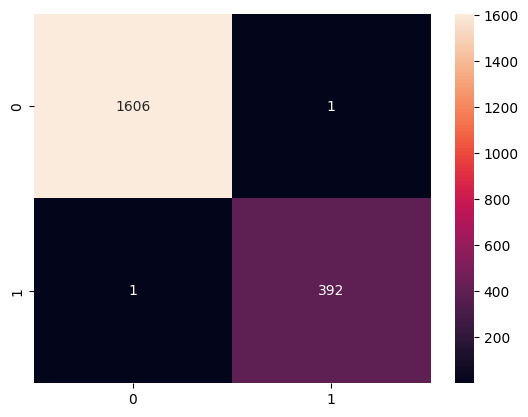

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred_nb_y),annot=True,fmt='d')

Accuracy_score = 0.999
precision_score = 0.9974554707379135
recall_score = 0.9974554707379135
f1_score = 0.9974554707379135


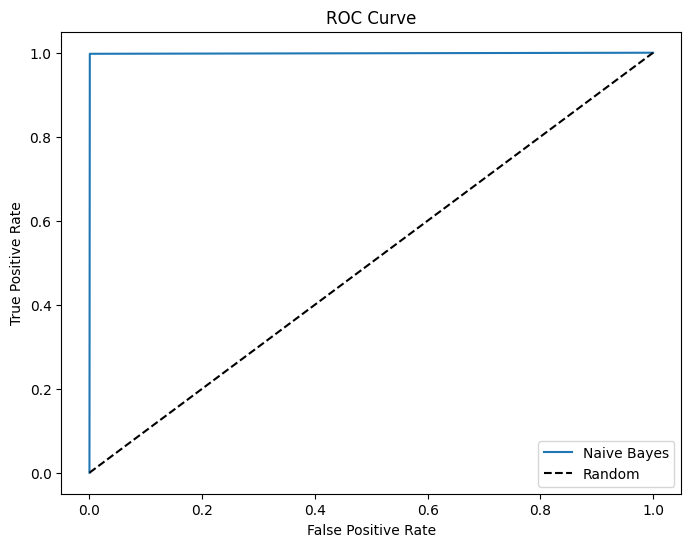

Area Under the Curve (AUC) for Naive Bayes: 0.9984165966010663


In [ ]:
#Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
pred_nb_y = nb.predict(x_test)

print("Accuracy_score =", accuracy_score(y_test, pred_nb_y ))
print("precision_score =", precision_score(y_test,pred_nb_y ))
print("recall_score =", recall_score(y_test, pred_nb_y ))
print("f1_score =", f1_score(y_test,pred_nb_y ))

# Compute ROC curve using predicted labels (y_pred_rf)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, pred_nb_y)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label= 'Naive Bayes')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate Area Under the Curve (AUC) for Random Forest
auc_score_nb = roc_auc_score(y_test,pred_nb_y)
print('Area Under the Curve (AUC) for Naive Bayes:', auc_score_nb)


In [ ]:
#KNeighbors
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
pred_kNN_y = kNN.predict(x_test)

In [ ]:
print("Accuracy_score =", accuracy_score(y_test, pred_kNN_y ))
print("precision_score =", precision_score(y_test,pred_kNN_y ))
print("recall_score =", recall_score(y_test, pred_kNN_y ))
print("f1_score =", f1_score(y_test,pred_kNN_y ))

Accuracy_score = 0.997
precision_score = 0.9974293059125964
recall_score = 0.9872773536895675
f1_score = 0.9923273657289003


In [ ]:
#confusion matrix and classification report
kNN_cm=confusion_matrix(y_test,pred_kNN_y)
print('confusion matrix is',kNN_cm)
print('classification report is',classification_report(y_test,pred_kNN_y))

confusion matrix is [[1606    1]
 [   5  388]]
classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      0.99      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<Axes: >

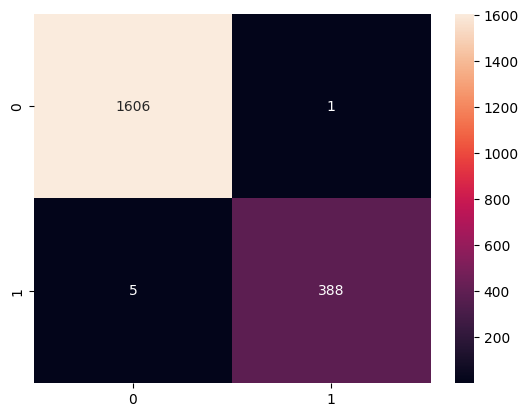

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred_kNN_y),annot=True,fmt='d')

Accuracy_score = 0.997
precision_score = 0.9974293059125964
recall_score = 0.9872773536895675
f1_score = 0.9923273657289003


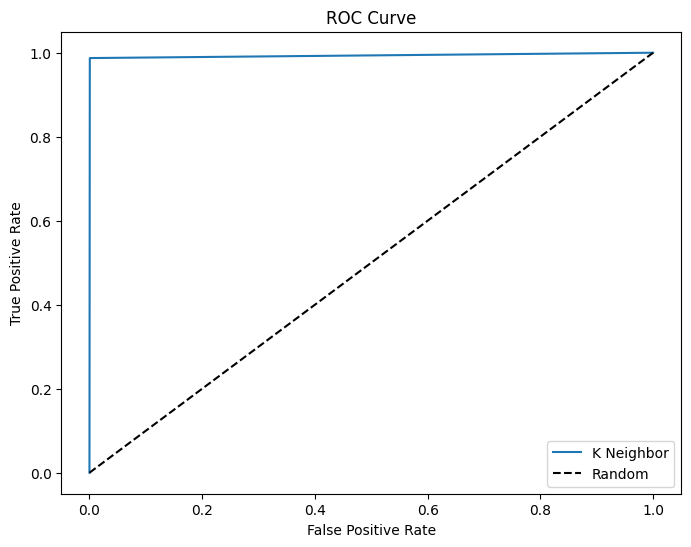

Area Under the Curve (AUC) for K Nearest Neighbor: 0.9933275380768933


In [ ]:
#KNeighbors
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
pred_kNN_y = kNN.predict(x_test)

print("Accuracy_score =", accuracy_score(y_test, pred_kNN_y ))
print("precision_score =", precision_score(y_test,pred_kNN_y ))
print("recall_score =", recall_score(y_test, pred_kNN_y ))
print("f1_score =", f1_score(y_test,pred_kNN_y))

# Compute ROC curve using predicted labels (y_pred_rf)
fpr_kNN, tpr_kNN, thresholds_kNN = roc_curve(y_test, pred_kNN_y)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_kNN, tpr_kNN, label= 'K Neighbor')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate Area Under the Curve (AUC) for Random Forest
auc_score_kNN = roc_auc_score(y_test,pred_kNN_y)
print('Area Under the Curve (AUC) for K Nearest Neighbor:', auc_score_kNN)


In [ ]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt_y = dt.predict(x_test)

In [ ]:
print("Accuracy_score =", accuracy_score(y_test, pred_dt_y ))
print("precision_score =", precision_score(y_test,pred_dt_y ))
print("recall_score =", recall_score(y_test, pred_dt_y ))
print("f1_score =", f1_score(y_test,pred_dt_y ))

Accuracy_score = 0.998
precision_score = 0.9949109414758269
recall_score = 0.9949109414758269
f1_score = 0.9949109414758269


In [ ]:
#confusion matrix and classification report
dt_cm=confusion_matrix(y_test,pred_dt_y)
print('confusion matrix is',dt_cm)
print('classification report is',classification_report(y_test,pred_dt_y))

confusion matrix is [[1605    2]
 [   2  391]]
classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.99      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<Axes: >

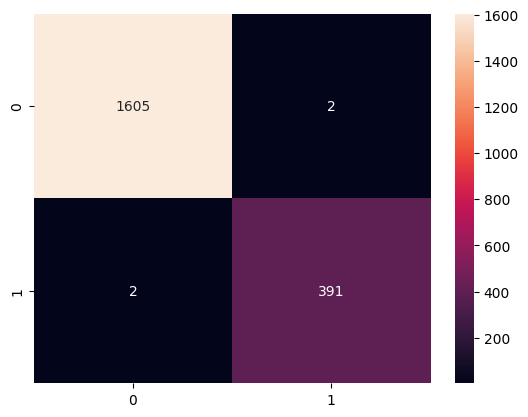

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred_dt_y),annot=True,fmt='d')

Accuracy_score = 0.9975
precision_score = 0.9923857868020305
recall_score = 0.9949109414758269
f1_score = 0.9936467598475223


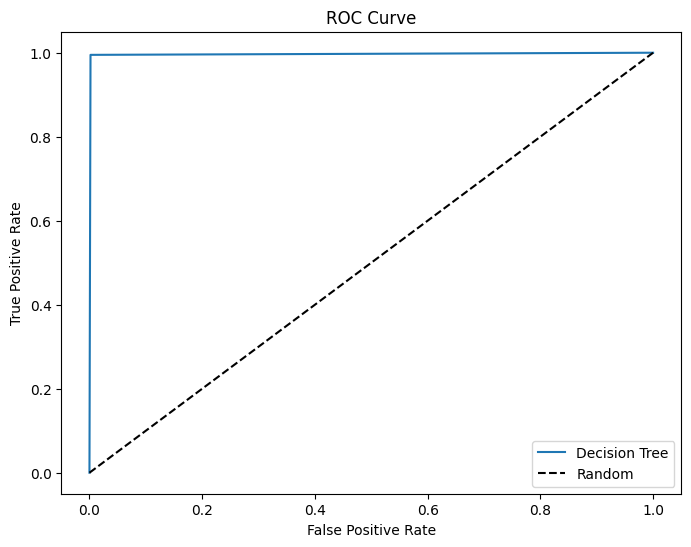

Area Under the Curve (AUC) for Decision Tree: 0.996522054434242


In [ ]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt_y = dt.predict(x_test)

print("Accuracy_score =", accuracy_score(y_test, pred_dt_y))
print("precision_score =", precision_score(y_test, pred_dt_y))
print("recall_score =", recall_score(y_test, pred_dt_y))
print("f1_score =", f1_score(y_test,pred_dt_y))


fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, pred_dt_y)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate Area Under the Curve (AUC) for Random Forest
auc_score_dt = roc_auc_score(y_test, pred_dt_y)
print('Area Under the Curve (AUC) for Decision Tree:', auc_score_dt)


In [ ]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf_y = rf.predict(x_test)

In [ ]:
print("Accuracy_score =", accuracy_score(y_test, pred_rf_y ))
print("precision_score =", precision_score(y_test,pred_rf_y ))
print("recall_score =", recall_score(y_test, pred_rf_y ))
print("f1_score =", f1_score(y_test,pred_rf_y ))

Accuracy_score = 0.999
precision_score = 0.9974554707379135
recall_score = 0.9974554707379135
f1_score = 0.9974554707379135


In [ ]:
#confusion matrix and classification report
rf_cm=confusion_matrix(y_test,pred_rf_y)
print('confusion matrix is',rf_cm)
print('classification report is',classification_report(y_test,pred_rf_y))

confusion matrix is [[1606    1]
 [   1  392]]
classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<Axes: >

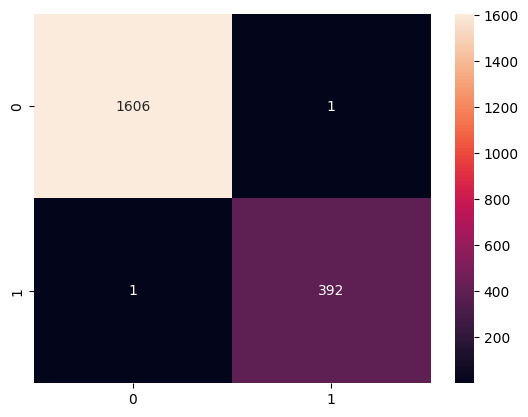

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred_rf_y),annot=True,fmt='d')

Accuracy_score = 0.999
precision_score = 0.9974554707379135
recall_score = 0.9974554707379135
f1_score = 0.9974554707379135


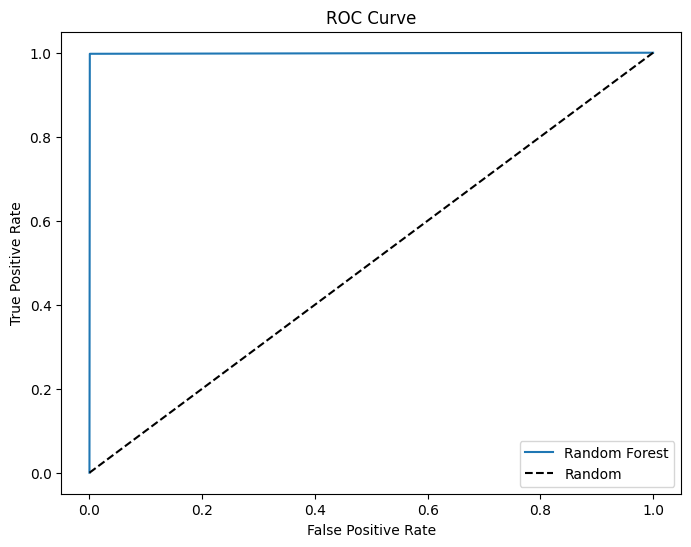

Area Under the Curve (AUC) for Random Forest: 0.9984165966010663


In [ ]:
# Random Forest
from sklearn.metrics import roc_curve, roc_auc_score
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Accuracy_score =", accuracy_score(y_test, y_pred_rf))
print("precision_score =", precision_score(y_test, y_pred_rf))
print("recall_score =", recall_score(y_test, y_pred_rf))
print("f1_score =", f1_score(y_test, y_pred_rf))

# Compute ROC curve using predicted labels (y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate Area Under the Curve (AUC) for Random Forest
auc_score_rf = roc_auc_score(y_test, y_pred_rf)
print('Area Under the Curve (AUC) for Random Forest:', auc_score_rf)


In [ ]:
models = {"Logistic Regression": LogisticRegression(),
          "kNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "naive-bayes": GaussianNB(),
          "Support vector Machine": SVC(),
          "Decision Tree": DecisionTreeClassifier()}

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.999,
 'kNN': 0.997,
 'Random Forest': 0.999,
 'naive-bayes': 0.999,
 'Support vector Machine': 0.999,
 'Decision Tree': 0.998}